In [15]:
import seaborn as sea
import plotly.express as px
import matplotlib.pyplot as plt
from   sklearn.decomposition import PCA
from   sklearn.datasets      import make_classification
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [16]:
data = make_classification(n_samples=1000,n_features=4,random_state=30)
X = data[0]
y = data[1]

In [17]:
fig = px.scatter_3d(z=X[:,0], x=X[:,1], y=X[:,2],color=y)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [5]:
pca = PCA(n_components=2)
xt = pca.fit_transform(X[:,0:2])

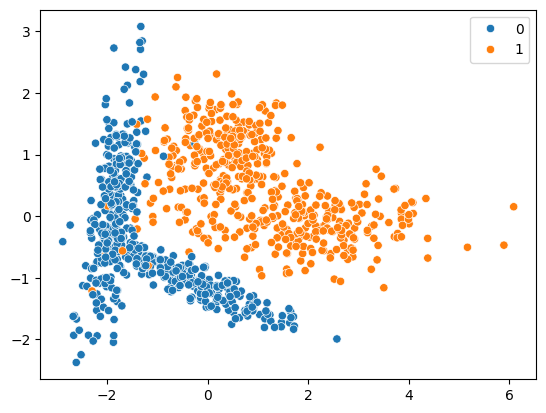

In [6]:
sea.scatterplot(x=xt[:,0],y=xt[:,1],hue=y)
plt.show()

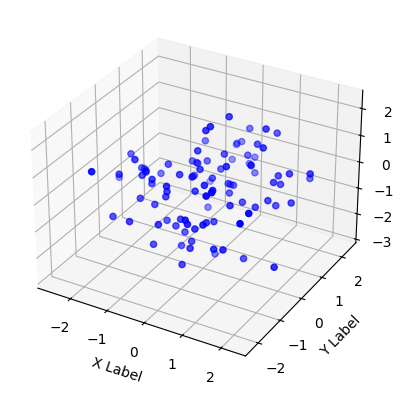

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generating random data
np.random.seed(0)
x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s(x, y, z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
